<a href="https://colab.research.google.com/github/airctic/icevision/blob/master/notebooks/efficientdet_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use EfficientDet

## Installing IceVision

!!! warning "Google Colab Dependencies Incompatibilities "
    This issue is specific to Google Colab. The issue shouldn't occur on a local machine.
    Some of our external dependencies are not aligned with the dependencies pre-installed in Google Colab. 
    After pip installing both icevision and icedata (by runnning the cell here below), some errors will eventually pop up.
    To fix this issue, press the **RESTART RUNTIME** button.

In [ ]:
!pip install icevision[all] icedata

## Imports

In [2]:
from icevision.all import *

## Common part to all models

### Loading Data

In [1]:
data_dir = icedata.pets.load()

### Parser

In [5]:
class_map = icedata.pets.class_map()

In [6]:
parser = icedata.pets.parser(data_dir, class_map)

In [3]:
train_records, valid_records = parser.parse()

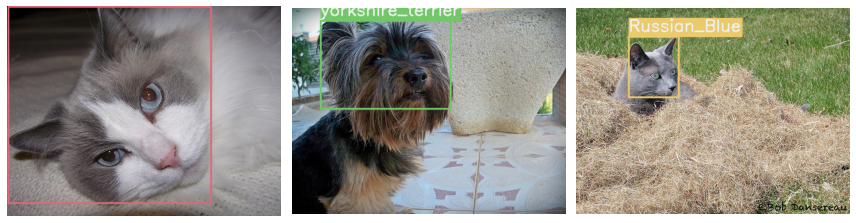

In [8]:
show_records(train_records[:3], ncols=3, class_map=class_map)

### Datasets

In [9]:
presize = 512
size = 384

In [10]:
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size), tfms.A.Normalize()])

In [11]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

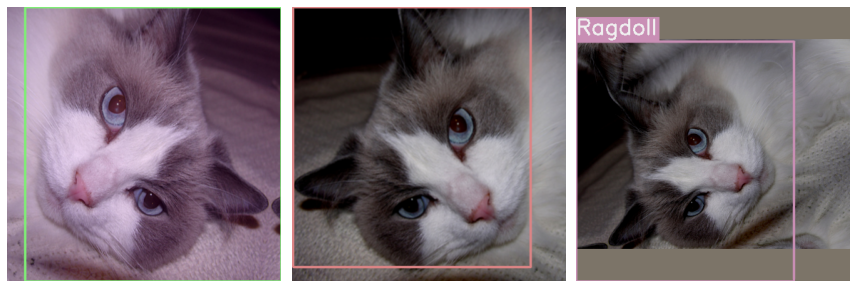

In [12]:
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3, class_map=class_map, denormalize_fn=denormalize_imagenet)

## EffecientDet Specific Part

### DataLoaders

In [13]:
train_dl = efficientdet.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = efficientdet.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

### Model

In [4]:
model = efficientdet.model(model_name='tf_efficientdet_lite0', num_classes=len(class_map), img_size=size)

### Fastai Learner 

In [16]:
metrics = [COCOMetric()]

In [17]:
learn = efficientdet.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

### Fastai Training

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.10000000149011612)

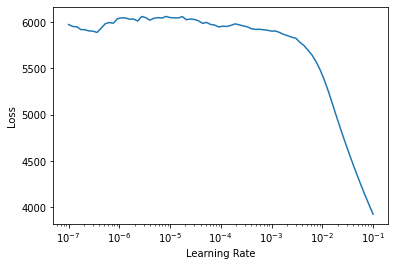

In [ ]:
learn.freeze()
learn.lr_find()

In [ ]:
learn.fine_tune(10, 1e-2, freeze_epochs=1)

## Inference
### DataLoader

In [19]:
infer_dl = efficientdet.infer_dl(valid_ds, batch_size=8)

### Predict

In [5]:
samples, preds = efficientdet.predict_dl(model, infer_dl)

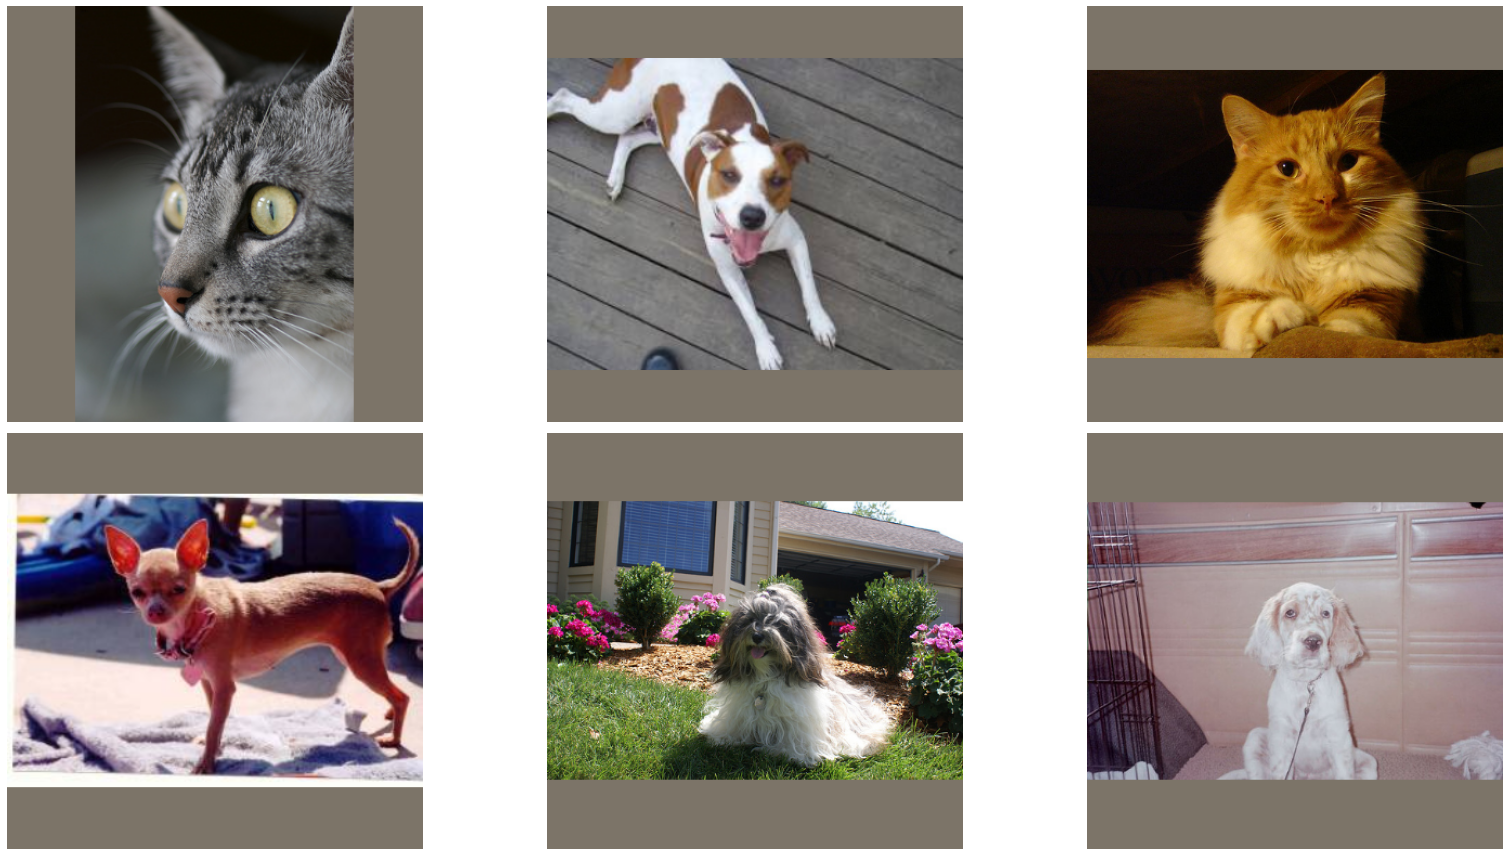

In [21]:
imgs = [sample['img'] for sample in samples]
show_preds(imgs=imgs[:6], preds=preds[:6], class_map=class_map, denormalize_fn=denormalize_imagenet, ncols=3)

## Happy Learning!

If you need any assistance, feel free to join our [forum](https://discord.gg/JDBeZYK).